**Run the following two cells before you begin.**

In [ ]:
%autosave 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [2]:
# Import data set
data=pd.read_csv("cleaned_data.csv")

In [3]:
# Create features list
a=list(('LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'))
data1=data[a]

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [4]:
from sklearn.model_selection import train_test_split
X=data1
y=data['default payment next month']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=24)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [5]:
from sklearn.preprocessing import MinMaxScaler
d1=MinMaxScaler()
scaled=d1.fit_transform(X)

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [67]:
model1 = LogisticRegression(solver='saga', penalty='L1', C=1000, random_state=1)


_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [7]:
from sklearn.pipeline import Pipeline
min_max_sca = MinMaxScaler()
scale_pipeline = Pipeline(steps=[('scaler', min_max_sca), ('model', model1)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [8]:
# Use `get_params`
scale_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='warn', n_jobs=None, penalty='L1',
                      random_state=1, solver='saga', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'model': LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='L1',
                    random_state=1, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1000,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_int

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [16]:
# View what `model__C` is set to currently
a=model1.get_params()
a['C']

1000

In [18]:
# Change `model__C` to 2
model1.set_params(C=2)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='L1',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:

c1_data=pd.read_csv("cleaned_data.csv")

c1_data.isnull().sum()

#X = df['EDUCATION'][0:10].values.reshape(-1,1)

X1=c1_data[['EDUCATION','LIMIT_BAL']]
y1=c1_data['default payment next month']#[0:10].values
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,test_size=0.2,random_state=24)
model2.fit(X1_train,y1_train)

C:\Users\madhumugi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model1.get_params()

{'C': 2,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'L1',
 'random_state': 1,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [21]:
model1.set_params(C= [ 100, 10, 1, 0.1, 0.01, 0.001])


LogisticRegression(C=[100, 10, 1, 0.1, 0.01, 0.001], class_weight=None,
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='L1', random_state=1, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False, random_state=1)

_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [59]:
def cross_val_C_search(k_folds, C_vals, pipeline, X, Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C= C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
                #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
                        #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]
                        #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)
                        #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
                        #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
                        #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
                        #Increment the fold counter
            fold_counter += 1
                    #Indicate progress
            print(pipeline.get_params()['model__C'])
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [57]:
k_folds

KFold(n_splits=4, random_state=1, shuffle=False)

In [100]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents
C_vals = np.float(10)**C_val_exponents
C_vals
n_folds = 5
k_folds = KFold(n_splits=n_folds, shuffle=False, random_state=1)
cross_val_C_search(k_folds, C_vals, scale_pipeline, X_train, y_train)

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

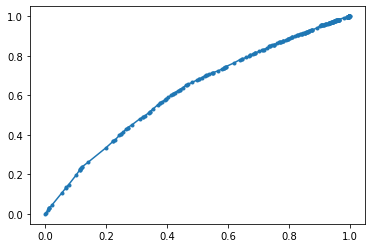

In [90]:
from matplotlib import pyplot
pre = model2.predict_proba(X1_train)
pre=pre[:,1]
roc_auc_score(y1_train, pre)
fpr,tpr,thresholds=roc_curve(y1_train,pre)
pyplot.plot(fpr,tpr,marker='.')

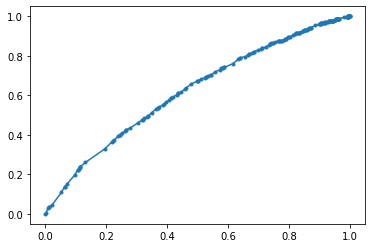

In [91]:
pre1 = model2.predict_proba(X1_test)
pre1=pre1[:,1]
roc_auc_score(y1_test, pre1)
fpr,tpr,thresholds=roc_curve(y1_test,pre1)
pyplot.plot(fpr,tpr,marker='.')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [92]:
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [95]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**

c1_data=pd.read_csv("cleaned_data.csv")

c1_data.isnull().sum()

#X = df['EDUCATION'][0:10].values.reshape(-1,1)

X2=c1_data[['EDUCATION','LIMIT_BAL']]
y2=c1_data['default payment next month']#[0:10].values
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,test_size=0.2,random_state=24)


C:\Users\madhumugi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
cross_val_C_search_pipe(k_folds, C_vals, scale_pipeline, X2_train, y2_train)


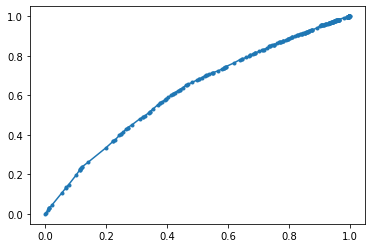

In [98]:
# Plot the average training and testing ROC AUC across folds, for each C value.
from matplotlib import pyplot
pre = model3.predict_proba(X2_train)
pre=pre[:,1]
roc_auc_score(y2_train, pre)
fpr,tpr,thresholds=roc_curve(y2_train,pre)
pyplot.plot(fpr,tpr,marker='.')

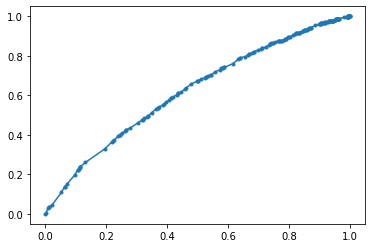

In [102]:
from matplotlib import pyplot
pre1 = model2.predict_proba(X2_test)
pre1=pre1[:,1]
roc_auc_score(y2_test, pre1)
fpr,tpr,thresholds=roc_curve(y2_test,pre1)
pyplot.plot(fpr,tpr,marker='.')

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**